In [1]:
# import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (15,9)

In [2]:
# Import dataset.

data = pd.read_excel('C:\\Users\\JAHFAITH IROKANULO\\Downloads\\Salary dataset response.xlsx')
data.head()

,Unnamed: 0,Timestamp,Degree,Experience,Role,Company,Company location,Country/Location,Monthly Salary
0,NaN,2020-02-15 08:55:40,Y,4,Backend Engineer,National Finance Company,Nigeria,Lagos Nigeria,"401,000 - 500,000"
1,NaN,2020-02-15 08:59:54,Y,2,Software Engineer,NaN,Nigeria,Nigeria,"201,000 - 300,000"
2,NaN,2020-02-15 09:08:27,Y,3,Associate Software Engineer,Andela,Nigeria,Lagos,"101,000 - 200,000"
3,NaN,2020-02-15 09:10:24,Y,2,Junior software engineer,NaN,America,Nigeria,">500,000"
4,NaN,2020-02-15 09:10:59,Y,2,iOS Developer,SC,Nigeria,Lagos,"201,000 - 300,000"


In [3]:
# Data size.

data.shape, data.size

((244, 9), 2196)

In [4]:
data.columns

Index(['Unnamed: 0', 'Timestamp', 'Degree ', 'Experience', 'Role', 'Company',
       'Company location', 'Country/Location', 'Monthly Salary'],
      dtype='object')

In [5]:
# Drop columns that are not needed.

data = data.drop(['Unnamed: 0', 'Timestamp', 'Company', 'Country/Location'], axis=1)
data.shape

(244, 5)

In [6]:
data = data.rename(columns={'Degree ':'Degree'})

In [7]:
data.isna().sum()

Degree              0
Experience          0
Role                0
Company location    0
Monthly Salary      7
dtype: int64

In [8]:
# Drop the data points with missing salary values.

data = data.dropna()
data.shape

(237, 5)

In [9]:
# Let's see the distribution of the target variable -Monthly Salary.

data['Monthly Salary'].value_counts()

>500,000             73
101,000 - 200,000    42
201,000 - 300,000    38
50,000 - 100,000     34
301,000 - 400,000    31
401,000 - 500,000    18
< 50,000              1
Name: Monthly Salary, dtype: int64

<AxesSubplot:>

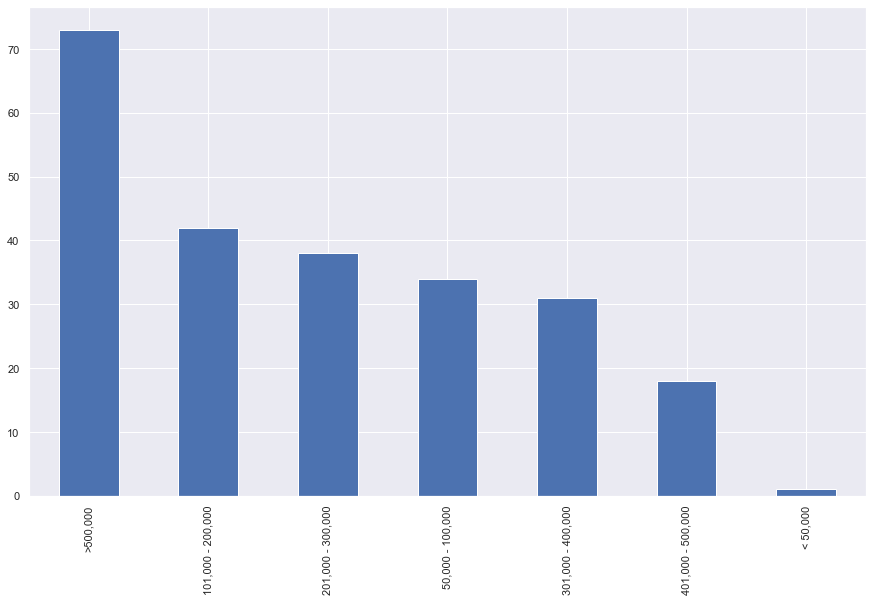

In [10]:
# Visualizing the distribution.

data['Monthly Salary'].value_counts().plot.bar()

In [11]:
# Representation of countries in each salary scale. 
cs = data.groupby('Monthly Salary')['Company location'].unique()
cs

Monthly Salary
101,000 - 200,000                                            [Nigeria]
201,000 - 300,000           [Nigeria, Europe, America, Rest of africa]
301,000 - 400,000                    [Ghana, Nigeria, America, Europe]
401,000 - 500,000                                            [Nigeria]
50,000 - 100,000                                      [Nigeria, Ghana]
< 50,000                                                     [Nigeria]
>500,000             [America, Nigeria, Europe, Ghana, Rest of africa]
Name: Company location, dtype: object

The above analysis shows the countries that are represented in each pay scale. Only Nigeria pays her developers between 401k-500k, Only Nigeria and Ghana pay below 201k. No American or European company paid below 201k.

In [12]:
# Grouping the data by Company Location and Salary to see which locations have the highest Salary range.

data.groupby(['Company location', 'Monthly Salary']).count()

Degree  Experience  Role
Company location Monthly Salary                             
America          201,000 - 300,000       2           2     2
                 301,000 - 400,000       1           1     1
                 >500,000               28          28    28
Europe           201,000 - 300,000       1           1     1
                 301,000 - 400,000       1           1     1
                 >500,000               13          13    13
Ghana            301,000 - 400,000       1           1     1
                 50,000 - 100,000        1           1     1
                 >500,000                1           1     1
Nigeria          101,000 - 200,000      42          42    42
                 201,000 - 300,000      34          34    34
                 301,000 - 400,000      28          28    28
                 401,000 - 500,000      18          18    18
                 50,000 - 100,000       33          33    33
                 < 50,000                1           1     1
                 >500,000               29          29    29
Rest of africa   201,000 - 300,000       1           1     1
                 >500,000                2           2     2

28 out of 31 Nigerians working remotely in America earn over 500k monthly.

13 out of 15 Nigerians working remotely in Europe earn over 500k monthly.

In Nigeria, majority of the tech talents earn between 101k - 200k.

In [13]:
# Encoding the target variable for future modeling.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
data['Monthly Salary'] = le.fit_transform(data['Monthly Salary'])

In [14]:
data['Monthly Salary'].value_counts()

6    73
0    42
1    38
4    34
2    31
3    18
5     1
Name: Monthly Salary, dtype: int64

In [15]:
# Company Location.

data['Company location'].value_counts()

Nigeria           185
America            31
Europe             15
Rest of africa      3
Ghana               3
Name: Company location, dtype: int64

<AxesSubplot:>

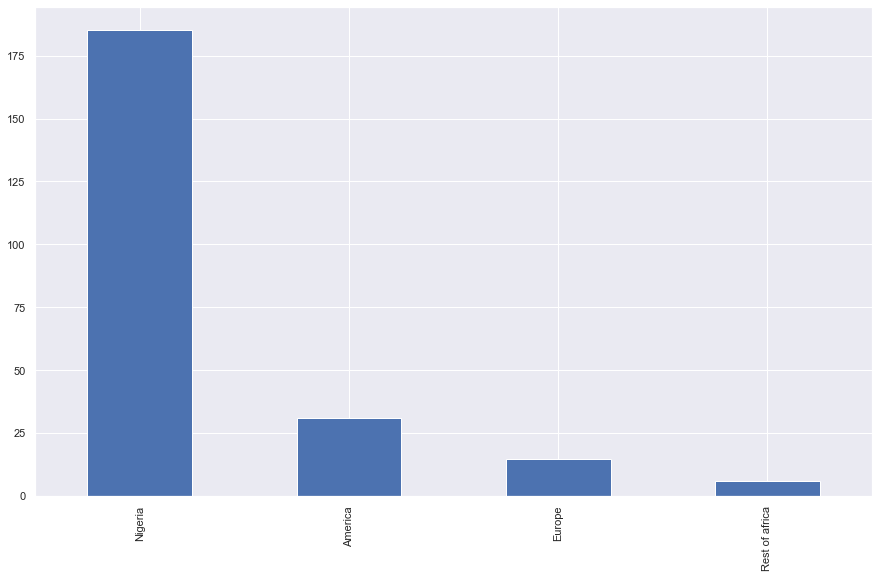

In [16]:
data['Company location'].replace({'Ghana':'Rest of africa'}, inplace=True)
data['Company location'].value_counts().plot.bar()

In [17]:
# Title.
# Let's class these roles into fewer categories and put them in a new column.

def JobTitle(x):
    DS = ['Data analyst ', 'Business Analyst', 'Data science intern ', 'Data scientist', 
         'Data Analyst/Business Intelligence Analyst', 'Business Data Analyst', 'Data Analyst', 
          'Risk analyst', 'Senior Analyst', 'Analyst',  'Data Scientist ', 'Data Scientist', 'Research analyst', 
         'Financial Analyst ', 'Senior Data Scientist', ]
    
    SE = ['Full-stack Software Engineer', 'Junior Software Developer', 'Mid-Level Software Developer ', 
         'Software Engineering Lead', 'Software dev', 'Intermidiate Dev', 
         'Senior Engineer', 'Junior Software engineer', 'Junior Engineer ', 'Software developer ', 
          'Engineering Lead', 'Fullstack software engineer', 'Android Engineer ','Junior Software developer ', 
         'Software Enginer', 'Senior software engineer ', 'Lead Software Developer', 'Freelance software developer', 
         'Senior Software developer', 'Sofware developer', 'Android engineer', 'Mobile developer ', 
         'Software engineer', 'Jnr software developer ', 'Senior Software Engineer', 'Software developer',
          'Developer Advocate & Software Engineer ', 'Senior Software Engineer ', 'Software Engineer ',
         'Associate Software Engineer', 'Junior software engineer', 'iOS Developer', 'Software engineer ', 
          'Software Developer ', 'Software Developer', 'Senior software engineer', 'Software Consultant',
       'Android Developer', 'Software Engineer', 'Android Engineer', 'Junior Software Developer ', 
          'Developer', 'Senior Developer', 'Developer Advocate ', 'software developer ',]
    
    FD = ['Frontend Developer', 'Front-end Developer', 'Frontend web development', 'Frontend/mobile developer ', 
          'Frontend engineer', 'React Native Developer', 'Developer ', 'Frontend Development', 'Frontend developers',
       'Front End Engineer', 'React native developer', 'frontend', 'WordPress Developer', 'Frontend Engineer', 
         'Frontend/ mobile engineer ', 'Front end developer ', 'Front-End Developer(Intern)', 'Front End Developer', 
         'frontend developer']
    
    BD = ['Backend engineer.', 'Backend Developer ', 'Back end developer', 'Backend ', 'backend developer ', 
         'Mid level backend engineer ',  'Backend developer ', 'Backend Developer', 'Backend Engineer ',  
         'Backend Engineer', 'Backend developer']
    
    FS = ['FullStack Developer ',  'Full stack engineer', 'Full Stack', 'Fullstack', 'Full Stack', 
         'Fullstack Developer', 'Full stack (heavy on the backend) ', 'Full stack Web Developer ', 'Web developer ']
    
    UD = ['UX Designer', 'Ui/Ux designer', 'UX Designer ', 'Graphics Designer', 'Designer (Remote) ', 
          'Designer']
    
    DE = ['Devops', 'Data Engineer ', 'Software/DevOps Engineer ']
    
    PD = ['Associate Product Analyst', 'Product manager ', 'Product Designer ', 'Product analyst', 
         'Product Associate ', 'Project Manager', 'Program Manager', 'Product Designer']
    
    IT = ['IT Support ', 'Support ', 'Project support officer', 'Operations', 'Senior Systems Administrator', 
         'Technical support', 'CTO', 'support', 'Information Systems Manager',  'Quality assurance engineer']
    
    DM = ['Digital channels analyst',]
    
    aa = [  ]
    
    if x in DS:
        return 'Data Scientist'
    elif x in SE:
        return 'Software Engineer'
    elif x in FD:
        return 'Frontend'
    elif x in BD:
        return 'Backend'
    elif x in FS:
        return 'Fullstack'
    elif x in UD:
        return 'Graphics Designer'
    elif x in DE:
        return 'Devops'
    elif x in PD:
        return 'Product Designer'
    elif x in IT:
        return 'IT'
    else:
        return 'Others'

In [18]:
# Title is the parent/collective name of the different roles.

data['Title'] = data['Role'].map(JobTitle)
data.head()

,Degree,Experience,Role,Company location,Monthly Salary,Title
0,Y,4,Backend Engineer,Nigeria,3,Backend
1,Y,2,Software Engineer,Nigeria,1,Software Engineer
2,Y,3,Associate Software Engineer,Nigeria,0,Software Engineer
3,Y,2,Junior software engineer,America,6,Software Engineer
4,Y,2,iOS Developer,Nigeria,1,Software Engineer


In [19]:
data['Title'].value_counts()

Software Engineer    101
Others                33
Frontend              22
Data Scientist        20
Backend               16
Product Designer      12
IT                    11
Fullstack             10
Graphics Designer      9
Devops                 3
Name: Title, dtype: int64

<AxesSubplot:ylabel='Title'>

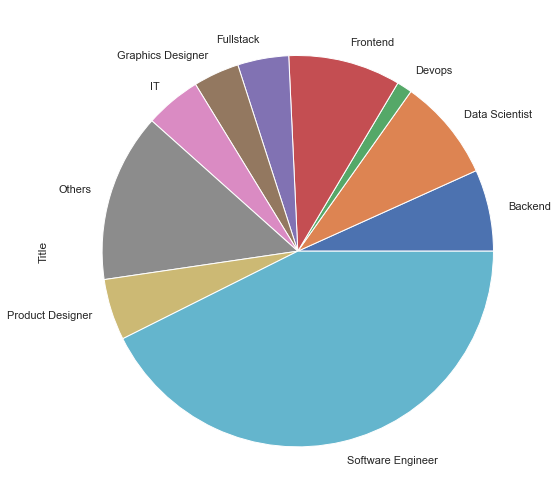

In [20]:
title_chart = data.groupby('Title')['Title'].count()
title_chart.plot.pie()

<AxesSubplot:>

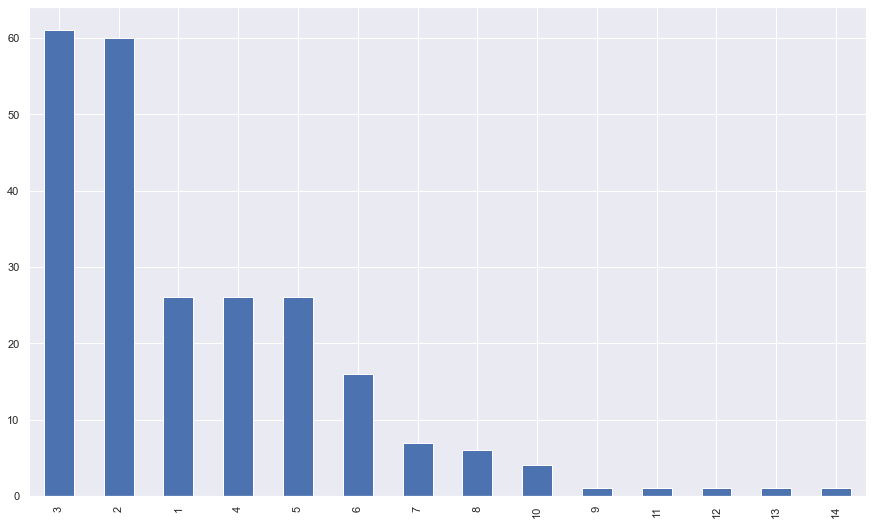

In [21]:
# Experience.
data['Experience'].value_counts().plot.bar()

C:\Users\JAHFAITH IROKANULO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Degree', ylabel='count'>

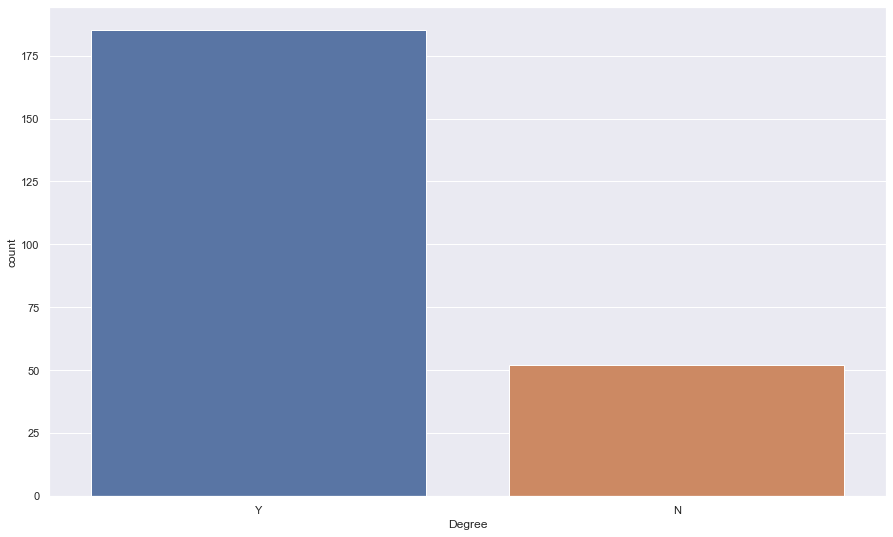

In [22]:
# Distribution of degrees across tech applicants.

sns.countplot(data['Degree'])

In [23]:
data.loc[data['Degree'] == 'N']

,Degree,Experience,Role,Company location,Monthly Salary,Title
9,N,2,Software Engineer,America,6,Software Engineer
11,N,3,Backend developer,Nigeria,0,Backend
15,N,3,Software Engineer,Nigeria,0,Software Engineer
16,N,2,Android Developer,Europe,6,Software Engineer
19,N,2,Android Engineer,Nigeria,1,Software Engineer
23,N,3,Software Engineer,Europe,6,Software Engineer
27,N,1,Backend Engineer,Nigeria,2,Backend
36,N,2,Jnr software developer,Nigeria,0,Software Engineer
39,N,8,Developer Advocate & Software Engineer,America,6,Software Engineer
41,N,2,Designer,Nigeria,1,Graphics Designer


The table above shows that there are non degree techies with high paying jobs both in Nigeria and abroad.

In [24]:
# Let's store all the rows where job title is 'Others' as Non_tech and count them.
Non_tech = data[data['Title'] == 'Others']
len(Non_tech)

33

In [25]:
# Drop the rows using their index.
data = data.drop(Non_tech.index, axis=0)
data.shape

(204, 6)

In [26]:
data = data.drop(['Role'], axis=1)
data.head(3)

,Degree,Experience,Company location,Monthly Salary,Title
0,Y,4,Nigeria,3,Backend
1,Y,2,Nigeria,1,Software Engineer
2,Y,3,Nigeria,0,Software Engineer


In [27]:
# Label Encoding categorical features.
data.loc[:, ['Degree', 'Company location', 'Title']] = \
data.loc[:, ['Degree', 'Company location', 'Title']].apply(le.fit_transform)

In [28]:
data.head(3)

,Degree,Experience,Company location,Monthly Salary,Title
0,1,4,2,3,0
1,1,2,2,1,8
2,1,3,2,0,8


In [29]:
# 1 = Y, 0 = N.

data['Degree'].value_counts()

1    155
0     49
Name: Degree, dtype: int64

In [30]:
# 0 = America, 1 = Europe, 2 = Nigeria, 3 = Rest of africa.

data['Company location'].value_counts()

2    156
0     30
1     12
3      6
Name: Company location, dtype: int64

In [31]:
# 0=Backend, 1=Data Scientist, 2=Devops, 3=Frontend, 
# 4=Fullstack, 5=Graphics Designer, 6=IT, 7=Products, 8=Software Engineer.

data['Title'].value_counts()

8    101
3     22
1     20
0     16
7     12
6     11
4     10
5      9
2      3
Name: Title, dtype: int64

In [32]:
# Correlation matrix

corr_matrix = data.corr()

In [33]:
# Let's see how the features correlate with the target.
corr_matrix['Monthly Salary'].sort_values(ascending=False)

Monthly Salary      1.000000
Experience          0.343183
Title               0.190944
Degree             -0.073841
Company location   -0.475380
Name: Monthly Salary, dtype: float64

In [34]:
corr_matrix

,Degree,Experience,Company location,Monthly Salary,Title
Degree,1.000000,0.102777,0.199500,-0.073841,0.010280
Experience,0.102777,1.000000,-0.158928,0.343183,0.222171
Company location,0.199500,-0.158928,1.000000,-0.475380,-0.094767
Monthly Salary,-0.073841,0.343183,-0.475380,1.000000,0.190944
Title,0.010280,0.222171,-0.094767,0.190944,1.000000


In [35]:
# Splitting into X and Y axes.

X = data.drop(['Monthly Salary'], axis=1)
Y = data['Monthly Salary']

print('Shape of Features: ',X.shape)
print('')
print('Shape of Target: ',Y.shape)

Shape of Features:  (204, 4)

Shape of Target:  (204,)


In [36]:
# Time To Model!

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss, f1_score

In [37]:
fold = KFold(n_splits=5, shuffle=True, random_state=12)

In [38]:
# Logistic Regression.

for train_index, test_index in fold.split(X, Y):
    # split into train and test.
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # train the model.
    reg = LogisticRegression(max_iter=1000, multi_class='multinomial', C=0.5)
    reg.fit(x_train, y_train)
    
    # making prediction.
    y_pred1 = reg.predict(x_test)
    
    # evaluate the model.
    f1 = f1_score(y_test, y_pred1, average='weighted')
    
    print('F1: ',f1)

F1:  0.3337533528787973
F1:  0.4066604127579738
F1:  0.34991289198606274
F1:  0.3560119811724433
F1:  0.31719457013574665


In [39]:
score = cross_val_score(reg, x_train, y_train, scoring='f1_weighted', cv=5)
avg_score = score.mean()
print('Mean Score: ',avg_score)

Mean Score:  0.35662303039875676


In [40]:
# Comparing Actual and Predicted outputs of Y(Monthly Salary)

table = pd.DataFrame(y_test)
table['Predicted'] = y_pred1
table.head(10)

,Monthly Salary,Predicted
3,6,6
14,1,6
27,2,0
30,6,6
32,6,6
40,6,6
54,4,0
80,1,1
82,6,6
83,1,6


In [41]:
# Random Forest.

for train_index, test_index in fold.split(X, Y):
    # split into train and test.
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # train the model.
    model = RandomForestClassifier(n_estimators=2000, max_depth=10, max_samples=20, random_state=12, max_features=4)
    model.fit(x_train, y_train)
    
    # making prediction.
    y_pred2 = model.predict(x_test)
    
    # evaluate the model.
    f1 = f1_score(y_test, y_pred2, average='weighted')
    
    print('F1: ',f1)

F1:  0.3493713073776701
F1:  0.36503009185936014
F1:  0.4451801984083189
F1:  0.5267593716661149
F1:  0.2821212121212121


In [42]:
score = cross_val_score(model, x_train, y_train, scoring='f1_weighted', cv=5)
avg_score = score.mean()
print('Mean Score: ',avg_score)

Mean Score:  0.38867895561929655


In [43]:
# Gradient Boost.

from sklearn.ensemble import GradientBoostingClassifier

for train_index, test_index in fold.split(X, Y):
    # split into train and test.
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # train the model.
    boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=2)
    boost.fit(x_train, y_train)
    
    # making prediction.
    y_pred3 = boost.predict(x_test)
    
    # evaluate the model.
    f1 = f1_score(y_test, y_pred3, average='weighted')
    
    print('F1: ',f1)

F1:  0.3991819421299803
F1:  0.37296336526118296
F1:  0.46441525953721075
F1:  0.41501673840267816
F1:  0.37841861440932645


In [44]:
score = cross_val_score(boost, x_train, y_train, scoring='f1_weighted', cv=5)
avg_score = score.mean()
print('Mean Score: ',avg_score)

Mean Score:  0.4054485813237048


In [45]:
# Serializing the Random Forest model.

import pickle

In [46]:
# Saving the model.
pickle.dump(model, open('Pace_Model.pkl', 'wb'))
print('All kwaret Sir!')

All kwaret Sir!


In [47]:
data.columns

Index(['Degree', 'Experience', 'Company location', 'Monthly Salary', 'Title'], dtype='object')

In [48]:
# Columns(Features) that were used to train the model.
x_train.columns

Index(['Degree', 'Experience', 'Company location', 'Title'], dtype='object')

In [49]:
# Saving the columns
pickle.dump(data.columns, open('Pace_Model_Columns.pkl', 'wb'))

In [50]:
# Saving the data used.
pickle.dump(x_train.columns, open('Pace_Training_Features.pkl', 'wb'))